In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
class BlackSwanTradingAlgorithm:
    def __init__(self, symbol, period="1y", interval="1d", z_threshold=3):
        """
        Initialize the Black Swan Trading Algorithm
        :param symbol: Stock or futures symbol to trade
        :param period: Historical period to fetch data for, default 1 year
        :param interval: Data interval, default is daily
        :param z_threshold: Z-score threshold for detecting extreme events
        """
        self.symbol = symbol
        self.period = period
        self.interval = interval
        self.z_threshold = z_threshold
        self.data = None
        self.black_swan_events = None
    
    def fetch_data(self):
        """
        Fetch historical data using yfinance
        """
        # Download the data using yfinance
        self.data = yf.download(self.symbol, period=self.period, interval=self.interval)
        
        # Calculate daily returns and remove NaN values
        self.data["Returns"] = self.data["Adj Close"].pct_change()
        self.data.dropna(inplace=True)

    def detect_black_swan_events(self):
        """
        Detect black swan events by calculating the z-score of returns
        """
        # Calculate the Z-score of the returns
        self.data["Z-Score"] = zscore(self.data["Returns"])
        
        # Filter the data for events where the absolute Z-score exceeds the threshold
        self.black_swan_events = self.data[np.abs(self.data["Z-Score"]) > self.z_threshold]

    def trade_on_black_swan(self):
        """
        Hypothetical trade logic for black swan events
        """
        trades = []  # List to store trades
        current_position = None  # Track the current position (either 'Long' or 'Short')
        
        # Loop through the detected Black Swan events
        for index, event in self.black_swan_events.iterrows():
            if event["Z-Score"] > self.z_threshold and current_position != "Short":
                # Extreme upward movement detected: place a Short entry
                trades.append({"Date": index, "Action": "Short Entry", "Price": event["Adj Close"]})
                current_position = "Short"
            elif event["Z-Score"] < -self.z_threshold and current_position != "Long":
                # Extreme downward movement detected: place a Long entry
                trades.append({"Date": index, "Action": "Long Entry", "Price": event["Adj Close"]})
                current_position = "Long"
            elif (current_position == "Short" and event["Z-Score"] < 0) or (current_position == "Long" and event["Z-Score"] > 0):
                # Exit the position on the opposite signal or when the trend reverses
                exit_action = "Exit Long" if current_position == "Long" else "Exit Short"
                trades.append({"Date": index, "Action": exit_action, "Price": event["Adj Close"]})
                current_position = None
        
        return trades
    
    def plot_signals(self, trades):
        """
        Plot the price data and mark the black swan events (signals) with entry and exit
        """
        plt.figure(figsize=(14, 8))
        
        # Plot the adjusted closing price
        plt.plot(self.data.index, self.data["Adj Close"], label=f'{self.symbol} Price', color='blue')
        
        # Mark the black swan entry/exit signals on the plot
        for trade in trades:
            if 'Entry' in trade['Action']:
                color = 'green' if 'Long' in trade['Action'] else 'red'
                plt.scatter(trade["Date"], trade["Price"], color=color, marker='^', label=trade["Action"], s=100)
            elif 'Exit' in trade['Action']:
                color = 'orange'
                plt.scatter(trade["Date"], trade["Price"], color=color, marker='v', label=trade["Action"], s=100)
        
        # Avoid duplicate labels in legend
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        
        # Plot formatting
        plt.title(f'Black Swan Events for {self.symbol}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(by_label.values(), by_label.keys())  # Use unique labels only
        plt.grid(True)
        
        # Show the plot
        plt.show()

    def run(self):
        """
        Run the algorithm: Fetch data, detect black swan events, and trade.
        """
        # Fetch historical data
        self.fetch_data()
        
        # Detect Black Swan events
        self.detect_black_swan_events()
        
        # Generate hypothetical trades based on detected events
        trades = self.trade_on_black_swan()
        
        # Plot the signals on the graph
        self.plot_signals(trades)
        
        return trades

[*********************100%%**********************]  1 of 1 completed


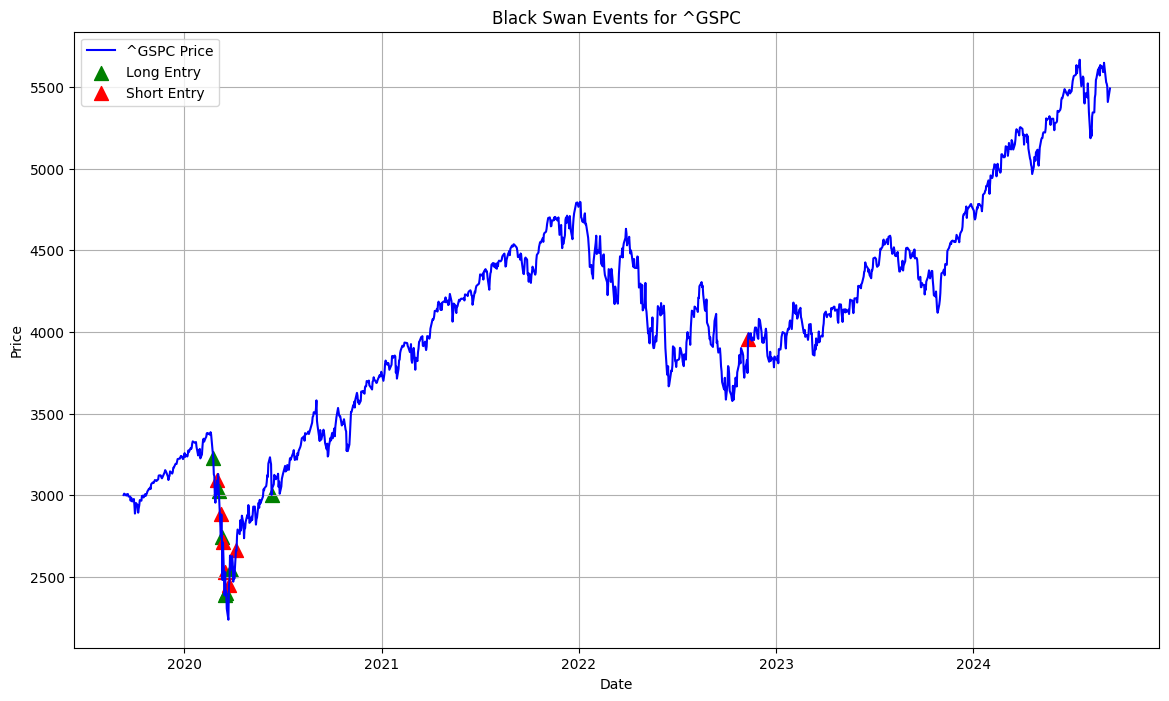

Detected Black Swan Events and placed 14 trades:
Date: 2020-02-24 00:00:00, Action: Long Entry, Price: 3225.889892578125
Date: 2020-03-02 00:00:00, Action: Short Entry, Price: 3090.22998046875
Date: 2020-03-05 00:00:00, Action: Long Entry, Price: 3023.93994140625
Date: 2020-03-10 00:00:00, Action: Short Entry, Price: 2882.22998046875
Date: 2020-03-11 00:00:00, Action: Long Entry, Price: 2741.3798828125
Date: 2020-03-13 00:00:00, Action: Short Entry, Price: 2711.02001953125
Date: 2020-03-16 00:00:00, Action: Long Entry, Price: 2386.1298828125
Date: 2020-03-17 00:00:00, Action: Short Entry, Price: 2529.18994140625
Date: 2020-03-18 00:00:00, Action: Long Entry, Price: 2398.10009765625
Date: 2020-03-24 00:00:00, Action: Short Entry, Price: 2447.330078125
Date: 2020-03-27 00:00:00, Action: Long Entry, Price: 2541.469970703125
Date: 2020-04-06 00:00:00, Action: Short Entry, Price: 2663.679931640625
Date: 2020-06-11 00:00:00, Action: Long Entry, Price: 3002.10009765625
Date: 2022-11-10 00:00:

In [6]:
# Example run
symbol = "^GSPC"
    
# Initialize the algorithm with the stock symbol, 1 year of data, daily frequency, and Z-score threshold of 3
black_swan_algo = BlackSwanTradingAlgorithm(symbol, period="5y", interval="1d", z_threshold=2.5)

# Run the algorithm
trades = black_swan_algo.run()

# Display detected trades based on Black Swan events
if trades:
    print(f"Detected Black Swan Events and placed {len(trades)} trades:")
    for trade in trades:
        print(f"Date: {trade['Date']}, Action: {trade['Action']}, Price: {trade['Price']}")
else:
    print("No Black Swan events detected.")